ASSIGNMENT-3

TASK-1: . Download the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TASK-2:  Load the dataset into the tool.

In [2]:
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


TASK-5: Check for Missing values and deal with them

In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

There are null values so we had to handle them by replacing with median and mode respectively

In [4]:
df.sex.mode()

0    MALE
Name: sex, dtype: object

In [5]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [6]:
df.sex=df.sex.fillna('MALE')

In [ ]:
df.sex=df.sex.replace('.','MALE')

In [8]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [10]:
med=df.median()
med

<ipython-input-10-cd3b0ce832fa>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med=df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [11]:
df=df.fillna(med)

In [12]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

We replaced all null values

TASK-3:  Perform Below Visualizations.
● Univariate Analysis
● Bi- Variate Analysis
● Multi-Variate Analysis

UNIVARIATE

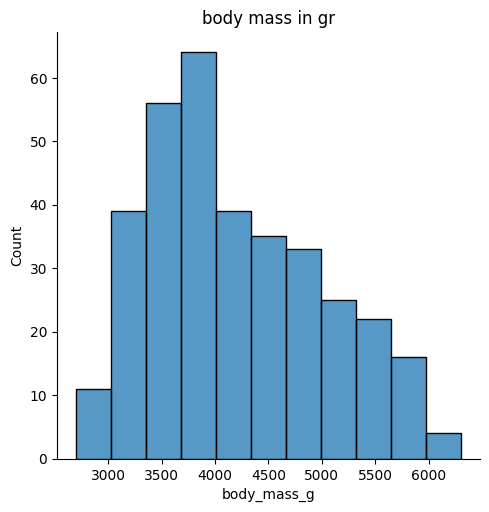

In [14]:
sns.displot(df.body_mass_g)
plt.title('body mass in gr')
plt.show()

<ipython-input-15-17a0b8d85467>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


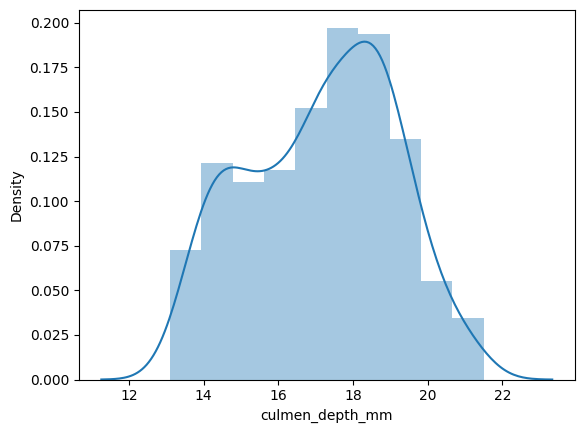

In [15]:
sns.distplot(df.culmen_depth_mm)
plt.show()

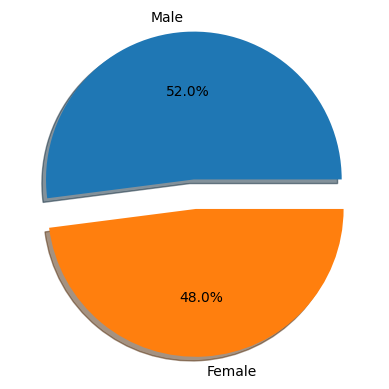

In [26]:
plt.pie(df.sex.value_counts(),[0.1,0.1],autopct='%1.1f%%',shadow=True,labels=['Male','Female'])
plt.show()

BIVARIATE

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

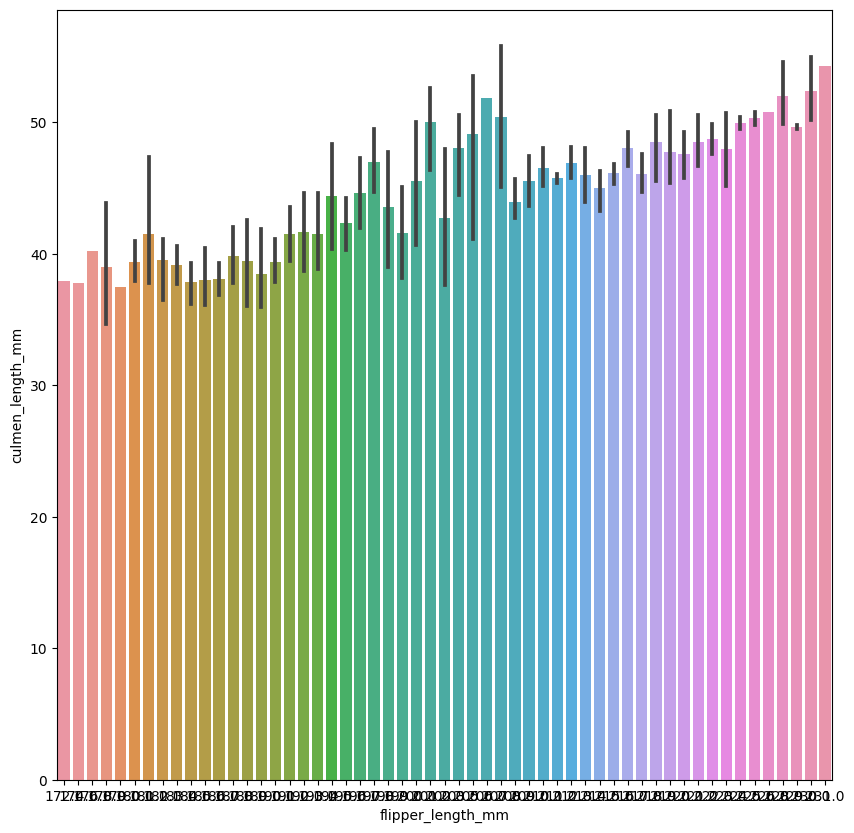

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.flipper_length_mm,y=df.culmen_length_mm)

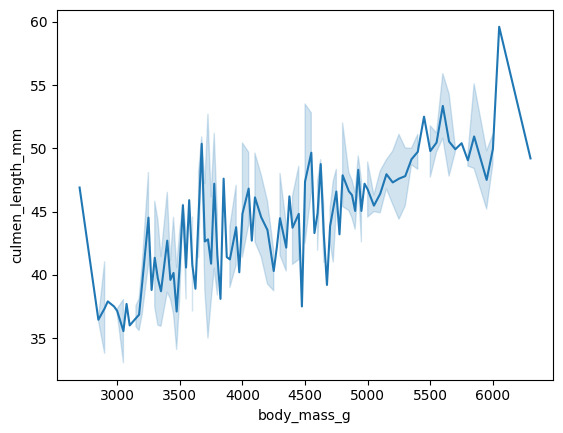

In [31]:
sns.lineplot(x=df.body_mass_g,y=df.culmen_length_mm)
plt.show()

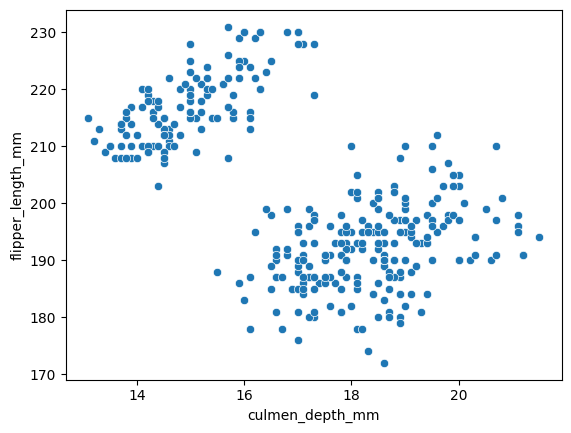

In [33]:
sns.scatterplot(x=df.culmen_depth_mm,y=df.flipper_length_mm)
plt.show()

Multivariate

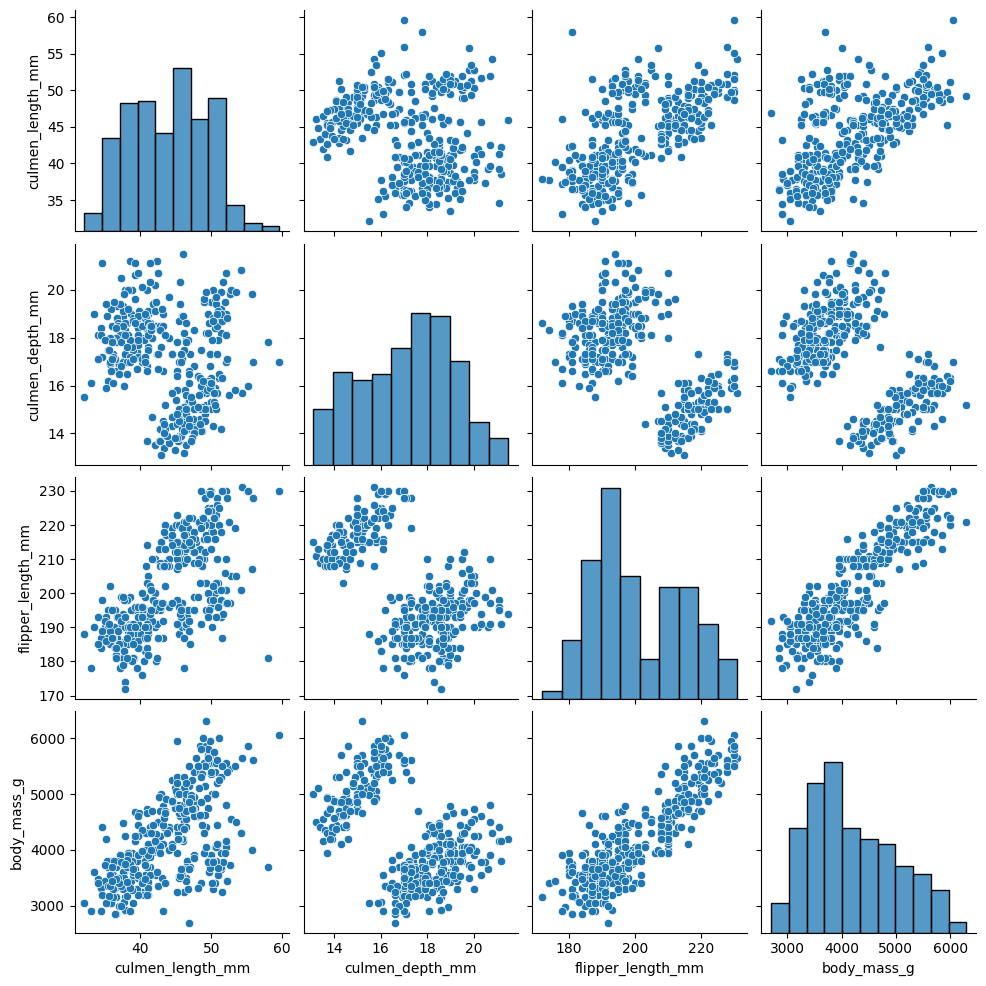

In [34]:
sns.pairplot(df)

<ipython-input-37-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


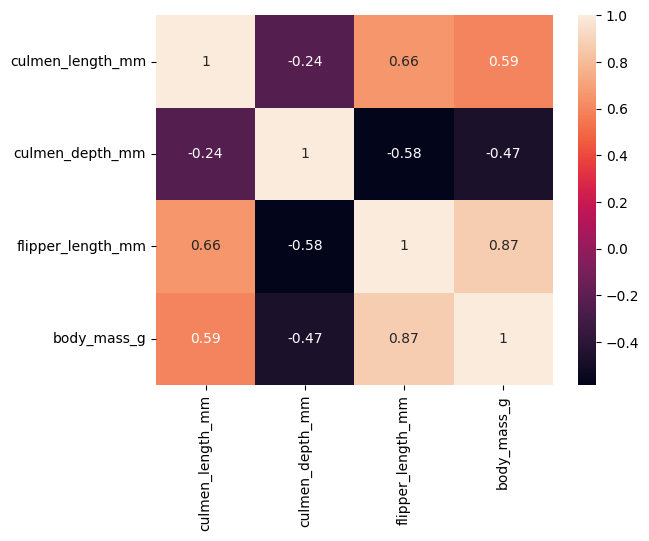

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

TASK-4: Perform descriptive statistics on the dataset.


In [38]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


TASK-6:  Find the outliers and replace them outliers

<Axes: >

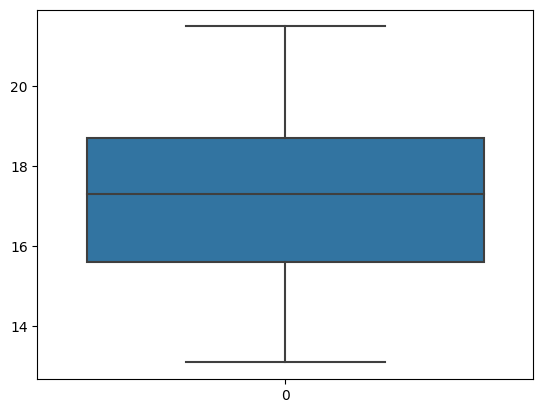

In [40]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

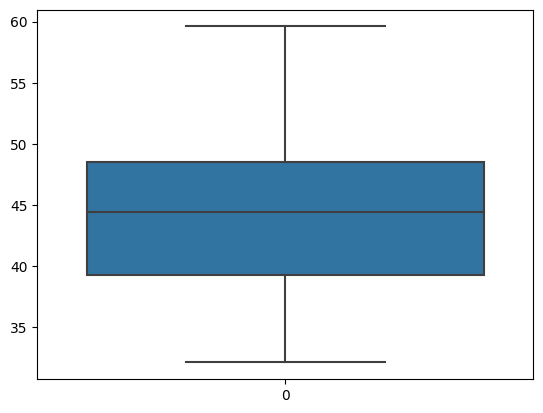

In [41]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

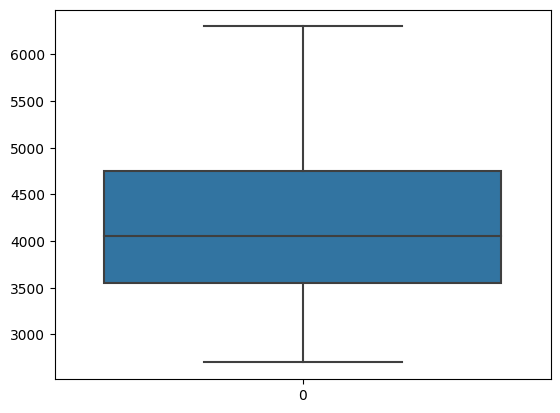

In [42]:
sns.boxplot(df.body_mass_g)

<Axes: >

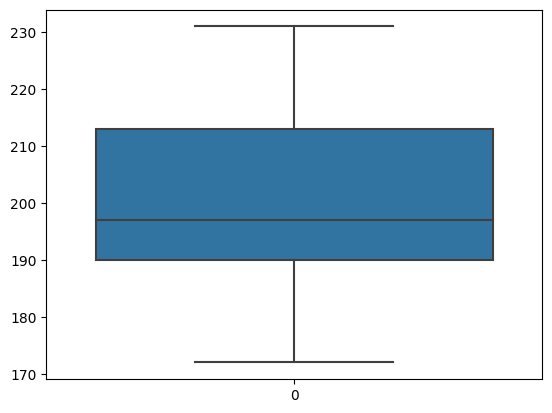

In [43]:
sns.boxplot(df.flipper_length_mm)

There are no outliers as we can see from the above plots.

TASK-8: Check for Categorical columns and perform encoding.

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
df.sex=le.fit_transform(df.sex)
df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)

In [49]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,2,0,44.45,17.3,197.0,4050.0,1
340,2,0,46.80,14.3,215.0,4850.0,0
341,2,0,50.40,15.7,222.0,5750.0,1
342,2,0,45.20,14.8,212.0,5200.0,0


TASK-7: Check the correlation of independent variables with the target

In [50]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

TASK-9: Split the data into dependent and independent variables.


In [52]:
x=df.drop(columns=['species'])
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0
...,...,...,...,...,...,...
339,0,44.45,17.3,197.0,4050.0,1
340,0,46.80,14.3,215.0,4850.0,0
341,0,50.40,15.7,222.0,5750.0,1
342,0,45.20,14.8,212.0,5200.0,0


In [53]:
y=df.species
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

TASK-10: Scaling the data

In [55]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [61]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...
339,0.0,0.449091,0.500000,0.423729,0.375000,1.0
340,0.0,0.534545,0.142857,0.728814,0.597222,0.0
341,0.0,0.665455,0.309524,0.847458,0.847222,1.0
342,0.0,0.476364,0.202381,0.677966,0.694444,0.0


TASK-11: Split the data into training and testing


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=10)

In [63]:
x_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
258,0.0,0.432727,0.059524,0.610169,0.458333,0.0
332,0.0,0.414545,0.250000,0.694915,0.541667,0.0
121,1.0,0.203636,0.797619,0.440678,0.222222,1.0
61,0.0,0.334545,0.952381,0.389831,0.472222,1.0
70,1.0,0.050909,0.702381,0.305085,0.250000,0.0
...,...,...,...,...,...,...
123,1.0,0.338182,0.642857,0.508475,0.326389,1.0
320,0.0,0.596364,0.226190,0.796610,0.597222,0.0
15,1.0,0.163636,0.559524,0.220339,0.277778,0.0
125,1.0,0.309091,0.702381,0.457627,0.361111,1.0


TASK-12: check the training and testing data shape

In [64]:
x_train.shape

(240, 6)

In [65]:
x_test.shape

(104, 6)

In [66]:
y_train.shape

(240,)

In [67]:
y_test.shape

(104,)

Thank you
